# <Center>  <u> <b> AI Project </b>  </u>  <Center> <u> <b> House Price Prediction </u> </b>

* ##  **Python Libraries Used In This Project**
    * Numpy     
    * Pandas
    * Matplotlib
    * Seaborn
    * SciKit-Learn

# Data Set:
Gathering a dataset that includes relevant features such as the size of the house, number of bedrooms and bathrooms, location, and other factors that may influence house prices.
In This Project We are Use a DataSet from kaggle.
The DataSet is called "California House Price".
* Link For This DataSet:
    https://www.kaggle.com/datasets/shibumohapatra/house-price
* Dataset Description: Field and Description
    * longitude (signed numeric - float) : Longitude value for the block in California, USA
    * latitude (numeric - float ) : Latitude value for the block in California, USA
    * housing_median_age (numeric - int ) : Median age of the house in the block
    * total_rooms (numeric - int ) : Count of the total number of rooms (excluding bedrooms) in all houses in the block
    * total_bedrooms (numeric - float ) : Count of the total number of bedrooms in all houses in the block
    * population (numeric - int ) : Count of the total number of population in the block
    * households (numeric - int ) : Count of the total number of households in the block
    * median_income (numeric - float ) : Median of the total household income of all the houses in the block
    * ocean_proximity (numeric - categorical ) : Type of the landscape of the block [ Unique Values : 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND' ]
    * median_house_value (numeric - int ) : Median of the household prices of all the houses in the block

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'archive/1553768847-housing.csv'
data = pd.read_csv(path)
print(data.shape)
data.head()

(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


# Data Preprocessing:
Cleaning and preparing the collected data for analysis.

* In this step we try to normalize some feature.
* We also use One-Hot Encoding for feature 'ocean_proximity'.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [8]:
data=data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  float64
 8   ocean_proximity     20433 non-null  object 
 9   median_house_value  20433 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.7+ MB


array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

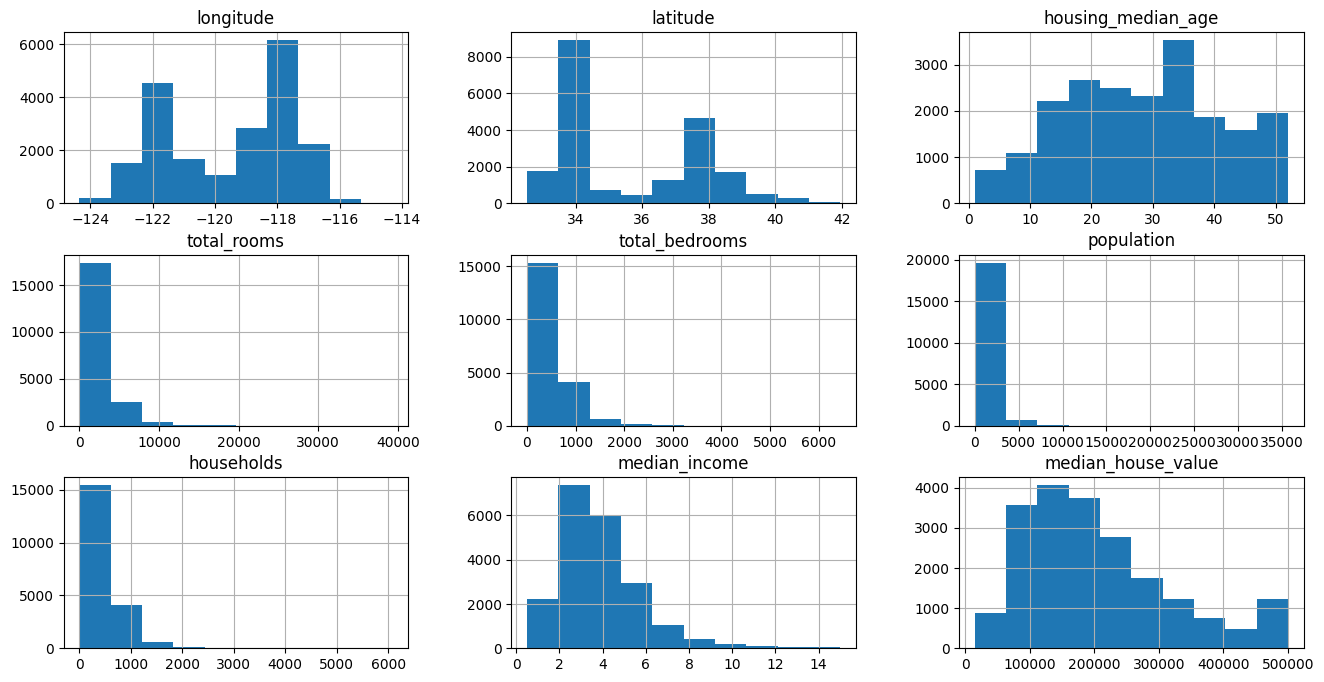

In [9]:
data.hist(figsize=(16,8))

C:\Users\ZAH\AppData\Local\Temp\ipykernel_11336\2994720317.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()


<AxesSubplot: >

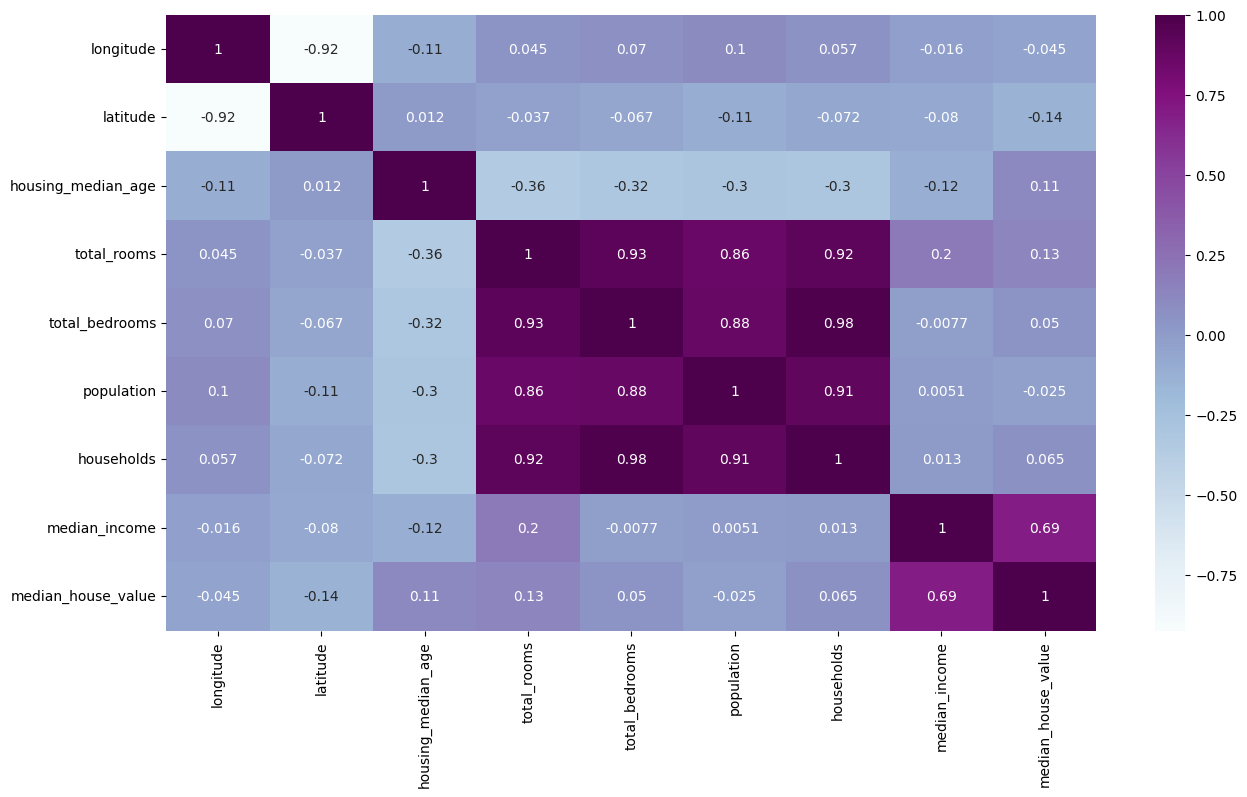

In [10]:
corr=data.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True,cmap="BuPu")

# Normalization
 * Here We Will Normalize Some Feature like total_rooms, total_bedrooms, populationl and households.

In [11]:
data['total_rooms']=np.log(data['total_rooms']+1)
data['total_bedrooms']=np.log(data['total_bedrooms']+1)
data['population']=np.log(data['population']+1)
data['households']=np.log(data['households']+1)

array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

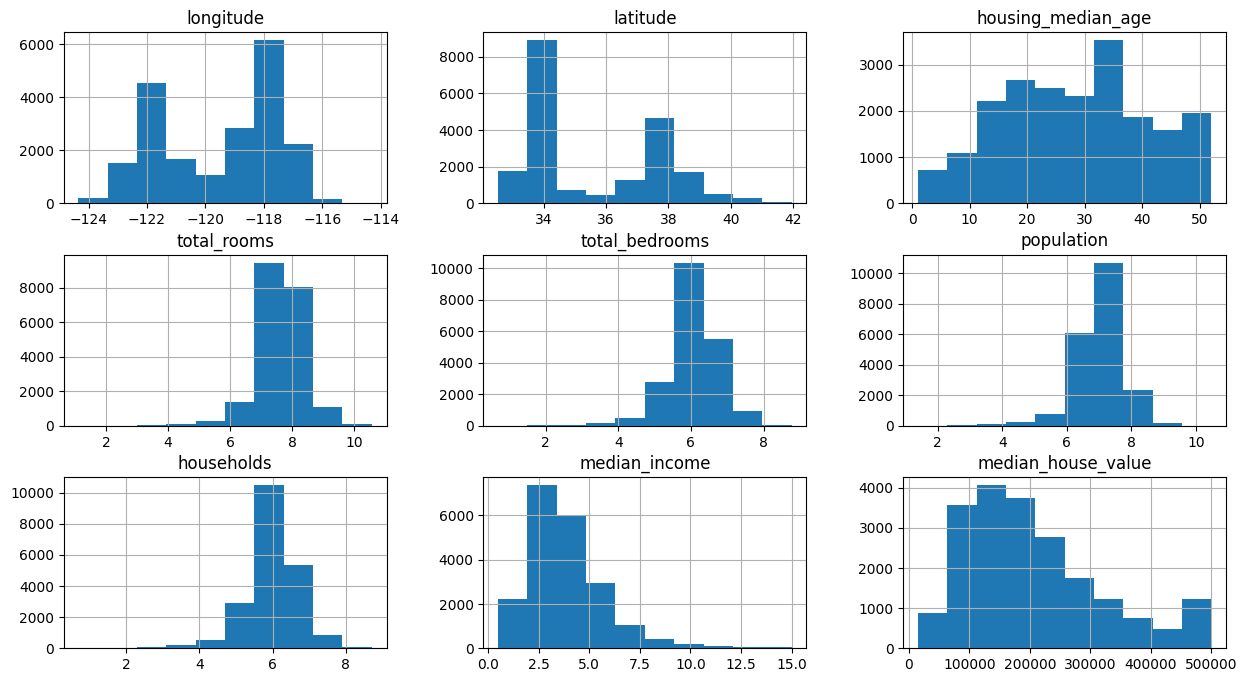

In [12]:
data.hist(figsize=(15,8))

In [13]:
data.ocean_proximity.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

# One-Hot Encoding
 * Here We Will Use One-Hot Encoding for 'ocean_proximity'.

In [14]:
data=data.join(pd.get_dummies(data.ocean_proximity)).drop(['ocean_proximity'],axis=1).astype(float)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,1.5603,78100.0,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,2.5568,77100.0,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,1.7000,92300.0,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.8672,84700.0,0.0,1.0,0.0,0.0,0.0


<AxesSubplot: >

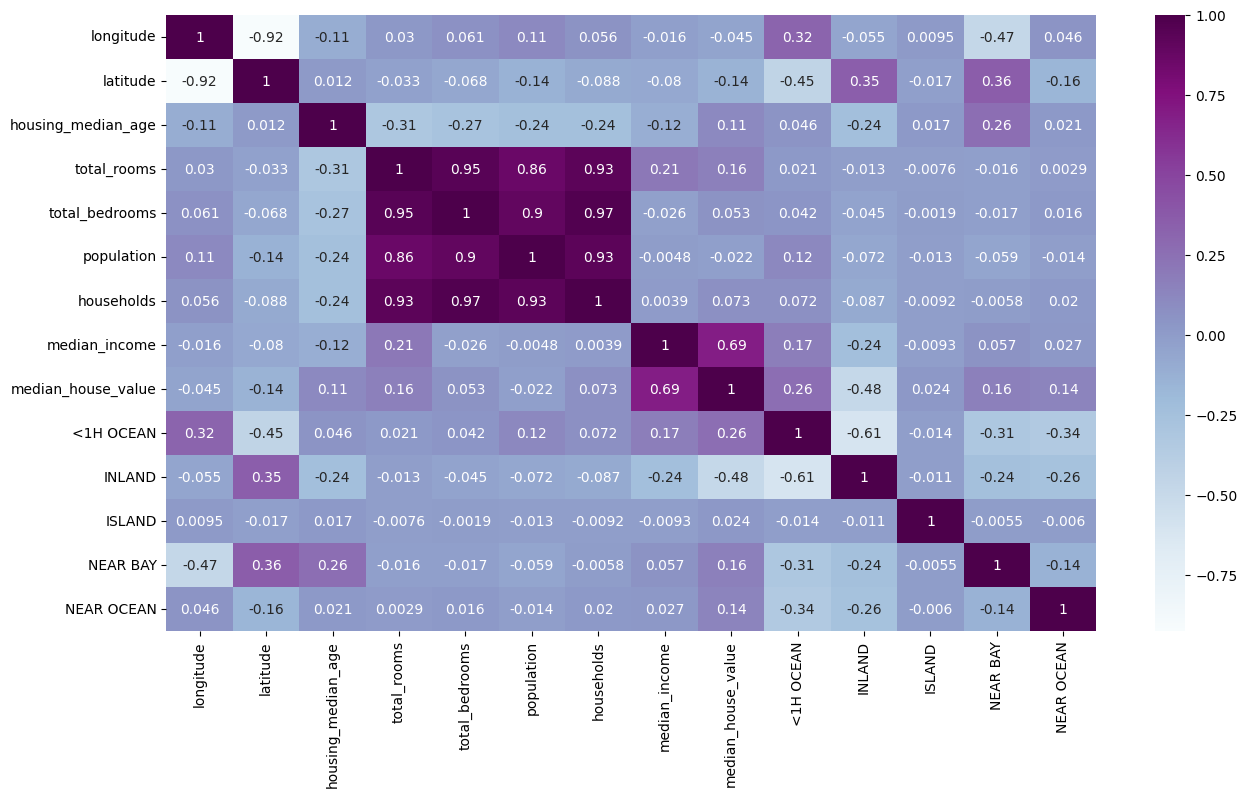

In [15]:
corr_3=data.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr_3,annot=True, cmap="BuPu")

<AxesSubplot: title={'center': 'longitude and latitude VS median house value'}, xlabel='latitude', ylabel='longitude'>

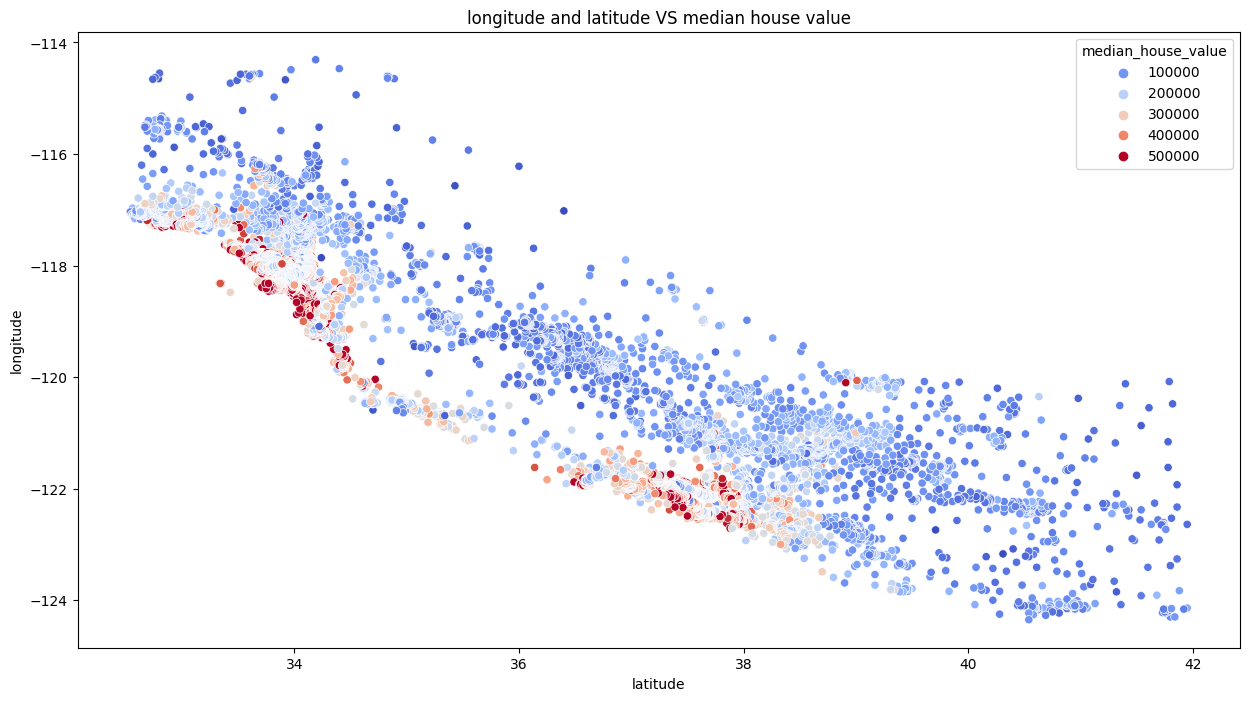

In [16]:
plt.figure(figsize=(15,8))
plt.title('longitude and latitude VS median house value')
sns.scatterplot(x='latitude',y='longitude',data=data,hue='median_house_value', palette='coolwarm')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   <1H OCEAN           20433 non-null  float64
 10  INLAND              20433 non-null  float64
 11  ISLAND              20433 non-null  float64
 12  NEAR BAY            20433 non-null  float64
 13  NEAR OCEAN          20433 non-null  float64
dtypes: float64(14)
memory usage: 2.8 MB


# Splitting The Data Set :
Splitting the dataset into training and testing subsets, fitting the RandomForestRegressor model on the training data

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [19]:
X=data.drop(['median_house_value'],axis=1)
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,1.5603,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,2.5568,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,1.7000,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.8672,0.0,1.0,0.0,0.0,0.0


In [20]:
y=data['median_house_value']
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
print(X_train.shape)
print(X_test.shape)

(16346, 13)
(4087, 13)


# Model Selection and Training : 
Splitting the dataset into training and testing subsets, fitting the RandomForestRegressor model on the training data.

In [19]:
model=RandomForestRegressor(n_estimators=1000,criterion='absolute_error',n_jobs=6,verbose=3)

In [20]:
model.fit(X_train,y_train)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.


building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000


[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:   14.4s


building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building tree 41 of 1000
building tree 42 of 1000
building tree 43 of 1000
building tree 44 of 1000
building tree 45 of 1000
building tree 46 of 1000
building tree 47 of 1000
building tree 48 of 1000
building tree 49 of 1000
building tree 50 of 1000
building tree 51 of 1000
building tree 52 of 1000
building tree 53 of 1000
building tree 54 of 1000
building tree 55 of 1000
building tree 56 of 1000
building tree 57 of 1000
building tree 58 of 1000
building tree 59 of 1000
building tree 60 of 1000
building tree 61 of 1000
building tree 62 of 1000
building tree 63 of 1000
building tree 64 of 1000
building tree 65 of 1000
building tree 66 of 1000


[Parallel(n_jobs=6)]: Done 116 tasks      | elapsed:  1.2min


building tree 123 of 1000
building tree 124 of 1000
building tree 125 of 1000
building tree 126 of 1000
building tree 127 of 1000
building tree 128 of 1000
building tree 129 of 1000
building tree 130 of 1000
building tree 131 of 1000
building tree 132 of 1000
building tree 133 of 1000
building tree 134 of 1000
building tree 135 of 1000
building tree 136 of 1000
building tree 137 of 1000
building tree 138 of 1000
building tree 139 of 1000
building tree 140 of 1000
building tree 141 of 1000
building tree 142 of 1000
building tree 143 of 1000
building tree 144 of 1000
building tree 145 of 1000
building tree 146 of 1000
building tree 147 of 1000
building tree 148 of 1000
building tree 149 of 1000
building tree 150 of 1000
building tree 151 of 1000
building tree 152 of 1000
building tree 153 of 1000
building tree 154 of 1000
building tree 155 of 1000
building tree 156 of 1000
building tree 157 of 1000
building tree 158 of 1000
building tree 159 of 1000
building tree 160 of 1000
building tre

[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:  2.8min


building tree 283 of 1000
building tree 284 of 1000
building tree 285 of 1000
building tree 286 of 1000
building tree 287 of 1000
building tree 288 of 1000
building tree 289 of 1000
building tree 290 of 1000
building tree 291 of 1000
building tree 292 of 1000
building tree 293 of 1000
building tree 294 of 1000
building tree 295 of 1000
building tree 296 of 1000
building tree 297 of 1000
building tree 298 of 1000
building tree 299 of 1000
building tree 300 of 1000
building tree 301 of 1000
building tree 302 of 1000
building tree 303 of 1000
building tree 304 of 1000
building tree 305 of 1000
building tree 306 of 1000
building tree 307 of 1000
building tree 308 of 1000
building tree 309 of 1000
building tree 310 of 1000
building tree 311 of 1000
building tree 312 of 1000
building tree 313 of 1000
building tree 314 of 1000
building tree 315 of 1000
building tree 316 of 1000
building tree 317 of 1000
building tree 318 of 1000
building tree 319 of 1000
building tree 320 of 1000
building tre

[Parallel(n_jobs=6)]: Done 500 tasks      | elapsed:  5.1min


building tree 507 of 1000
building tree 508 of 1000
building tree 509 of 1000
building tree 510 of 1000
building tree 511 of 1000
building tree 512 of 1000
building tree 513 of 1000
building tree 514 of 1000
building tree 515 of 1000
building tree 516 of 1000
building tree 517 of 1000
building tree 518 of 1000
building tree 519 of 1000
building tree 520 of 1000
building tree 521 of 1000
building tree 522 of 1000
building tree 523 of 1000
building tree 524 of 1000
building tree 525 of 1000
building tree 526 of 1000
building tree 527 of 1000
building tree 528 of 1000
building tree 529 of 1000
building tree 530 of 1000
building tree 531 of 1000
building tree 532 of 1000
building tree 533 of 1000
building tree 534 of 1000
building tree 535 of 1000
building tree 536 of 1000
building tree 537 of 1000
building tree 538 of 1000
building tree 539 of 1000
building tree 540 of 1000
building tree 541 of 1000
building tree 542 of 1000
building tree 543 of 1000
building tree 544 of 1000
building tre

[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  8.1min


building tree 795 of 1000
building tree 796 of 1000
building tree 797 of 1000
building tree 798 of 1000
building tree 799 of 1000
building tree 800 of 1000
building tree 801 of 1000
building tree 802 of 1000
building tree 803 of 1000
building tree 804 of 1000
building tree 805 of 1000
building tree 806 of 1000
building tree 807 of 1000
building tree 808 of 1000
building tree 809 of 1000
building tree 810 of 1000
building tree 811 of 1000
building tree 812 of 1000
building tree 813 of 1000
building tree 814 of 1000
building tree 815 of 1000
building tree 816 of 1000
building tree 817 of 1000
building tree 818 of 1000
building tree 819 of 1000
building tree 820 of 1000
building tree 821 of 1000
building tree 822 of 1000
building tree 823 of 1000
building tree 824 of 1000
building tree 825 of 1000
building tree 826 of 1000
building tree 827 of 1000
building tree 828 of 1000
building tree 829 of 1000
building tree 830 of 1000
building tree 831 of 1000
building tree 832 of 1000
building tre

[Parallel(n_jobs=6)]: Done 1000 out of 1000 | elapsed: 10.3min finished


RandomForestRegressor(criterion='absolute_error', n_estimators=1000, n_jobs=6,
                      verbose=3)

# Evaluating it's performance Using Mean Absolute Error (MAE): 

In [21]:
pre=model.predict(X_test)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 116 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 500 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1000 out of 1000 | elapsed:    0.1s finished


In [22]:
pre

array([244651.101, 281145.984, 349479.723, ..., 140859.2  , 262703.354,
       105150.8  ])

In [23]:
print('Mean Absolute Error Score = ',mean_absolute_error(y_test,pre))

Mean Absolute Error Score =  31359.612388182042


In [24]:
a=model.score(X_test,y_test)
a=a*100

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 116 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 500 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1000 out of 1000 | elapsed:    0.1s finished


In [25]:
print('The accuracy of the model is',a,'%')

The accuracy of the model is 82.33039841928739 %


## Root Mean Squared Error (RMSE)

In [30]:
y_pre=loaded_model.predict(X_test)
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, y_pre))
print("The Root Mean Squred Error(RMSE) is", rms)

The Root Mean Squred Error(RMSE) is 27161.997284331304


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 116 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 500 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 1000 out of 1000 | elapsed:    0.1s finished


<AxesSubplot: title={'center': 'True Price VS Model Prediction Price'}, xlabel='total_rooms', ylabel='median_house_value'>

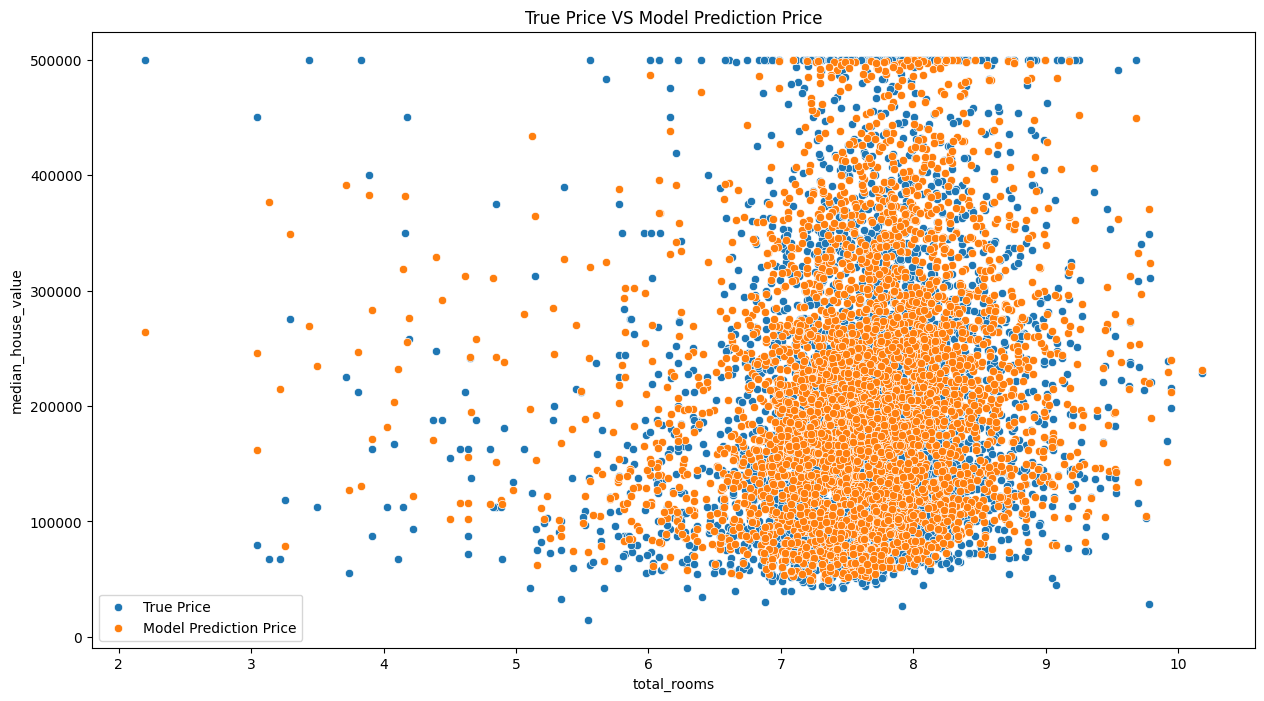

In [26]:
plt.figure(figsize=(15,8))
plt.title("True Price VS Model Prediction Price")
sns.scatterplot(x=X_test['total_rooms'],y=y_test,label="True Price")
sns.scatterplot(x=X_test['total_rooms'],y=pre,label='Model Prediction Price')

# Saving The Trained Model

In [27]:
import pickle

In [28]:
filename = "random_forest.pickle"
pickle.dump(model, open(filename, "wb"))

# Load The Save Model

## **To Try Out The Model From User Input**
* We will Load the save model so that we don't need to train it every time

In [7]:
import pickle
import numpy as np
filename = "random_forest.pickle"
loaded_model = pickle.load(open(filename, "rb"))

## Example of Input :
* longitude = -122.23 	
* latitude = 37.88	
* housing_median_age = 41	
* total_rooms = 880
* total_bedrooms = 129		
* population = 322
* households = 126		
* median_income = 8.3252 	
* ocean_proximity	= NEAR BAY

## The real price of House
* median_house_value = 452600

In [ ]:
longitude = input("Enter longitude: ")
latitude = input("Enter latitude: ")
housing_median_age = input("Enter housing median age: ")
total_rooms = input("Enter total rooms: ")
total_bedrooms = input("Enter total bedrooms: ")
population = input("Enter population: ")
households = input("Enter households: ")
median_income = input("Enter median income: ")
H_OCEAN = input("Enter <1H OCEAN: ")
INLAND = input("Enter INLAND: ")
ISLAND = input("Enter ISLAND: ")
NEAR_BAY = input("Enter NEAR BAY: ")
NEAR_OCEAN = input("Enter NEAR OCEAN: ")

x_pre = [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, H_OCEAN, INLAND, ISLAND, NEAR_BAY, NEAR_OCEAN]
x_pre_2d = np.array(x_pre).reshape(1, -1)

Enter longitude:  -114
Enter latitude:  32


In [4]:
y_pre=loaded_model.predict(x_pre_2d)

C:\Users\ZAH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 116 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 500 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 1000 out of 1000 | elapsed:    0.0s finished


In [5]:
print('The Model Predicte',y_pre)

The Model Predicte [456173.555]
